<h1><u>Data Exploration</u></h1>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Importing the dataset
dataset = pd.read_csv('ingredient.csv')
dataset.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [17]:
#Getting variables information
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


(214, 9)

In [18]:
#Summary statistics of the dataset
dataset.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [35]:
#Correlation between variables
corr=dataset.corr(method='spearman')
corr

,a,b,c,d,e,f,g,h,i
a,1.000000,0.031040,0.144156,-0.491821,-0.525733,-0.288001,0.703777,-0.181511,0.096181
b,0.031040,1.000000,-0.126451,0.135910,-0.265643,-0.584503,0.027205,0.411111,-0.217631
c,0.144156,-0.126451,1.000000,-0.512420,-0.336811,0.200742,-0.289119,-0.456107,0.095487
d,-0.491821,0.135910,-0.512420,1.000000,0.196513,0.153438,-0.280952,0.474564,-0.076313
e,-0.525733,-0.265643,-0.336811,0.196513,1.000000,-0.000719,-0.221912,0.170212,-0.071995
f,-0.288001,-0.584503,0.200742,0.153438,-0.000719,1.000000,-0.472703,-0.260406,0.091903
g,0.703777,0.027205,-0.289119,-0.280952,-0.221912,-0.472703,1.000000,-0.007770,0.111897
h,-0.181511,0.411111,-0.456107,0.474564,0.170212,-0.260406,-0.007770,1.000000,0.009680
i,0.096181,-0.217631,0.095487,-0.076313,-0.071995,0.091903,0.111897,0.009680,1.000000


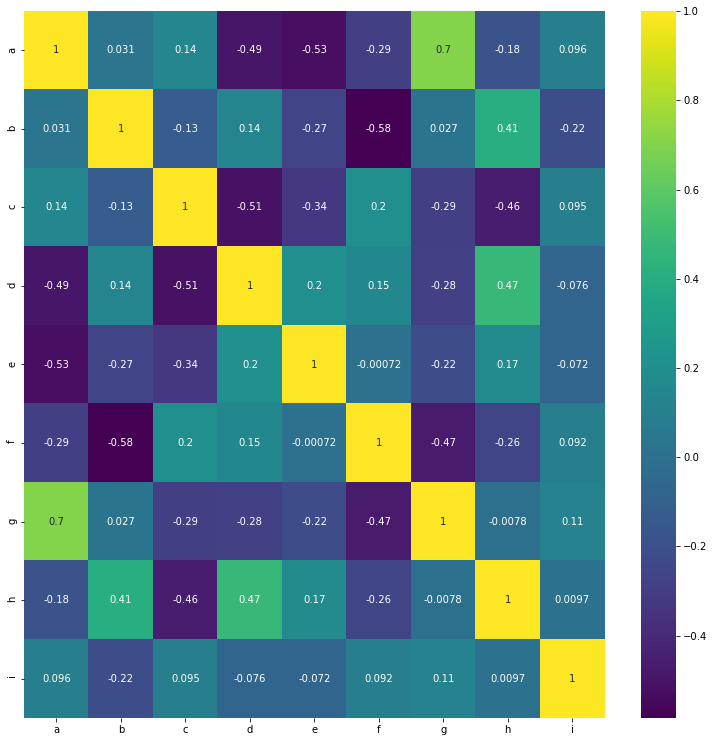

In [36]:
#Visualizing the correlation
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(corr,annot=True, ax=ax, cmap='viridis')
plt.show()

#Values closer to 1 means there is high correlation

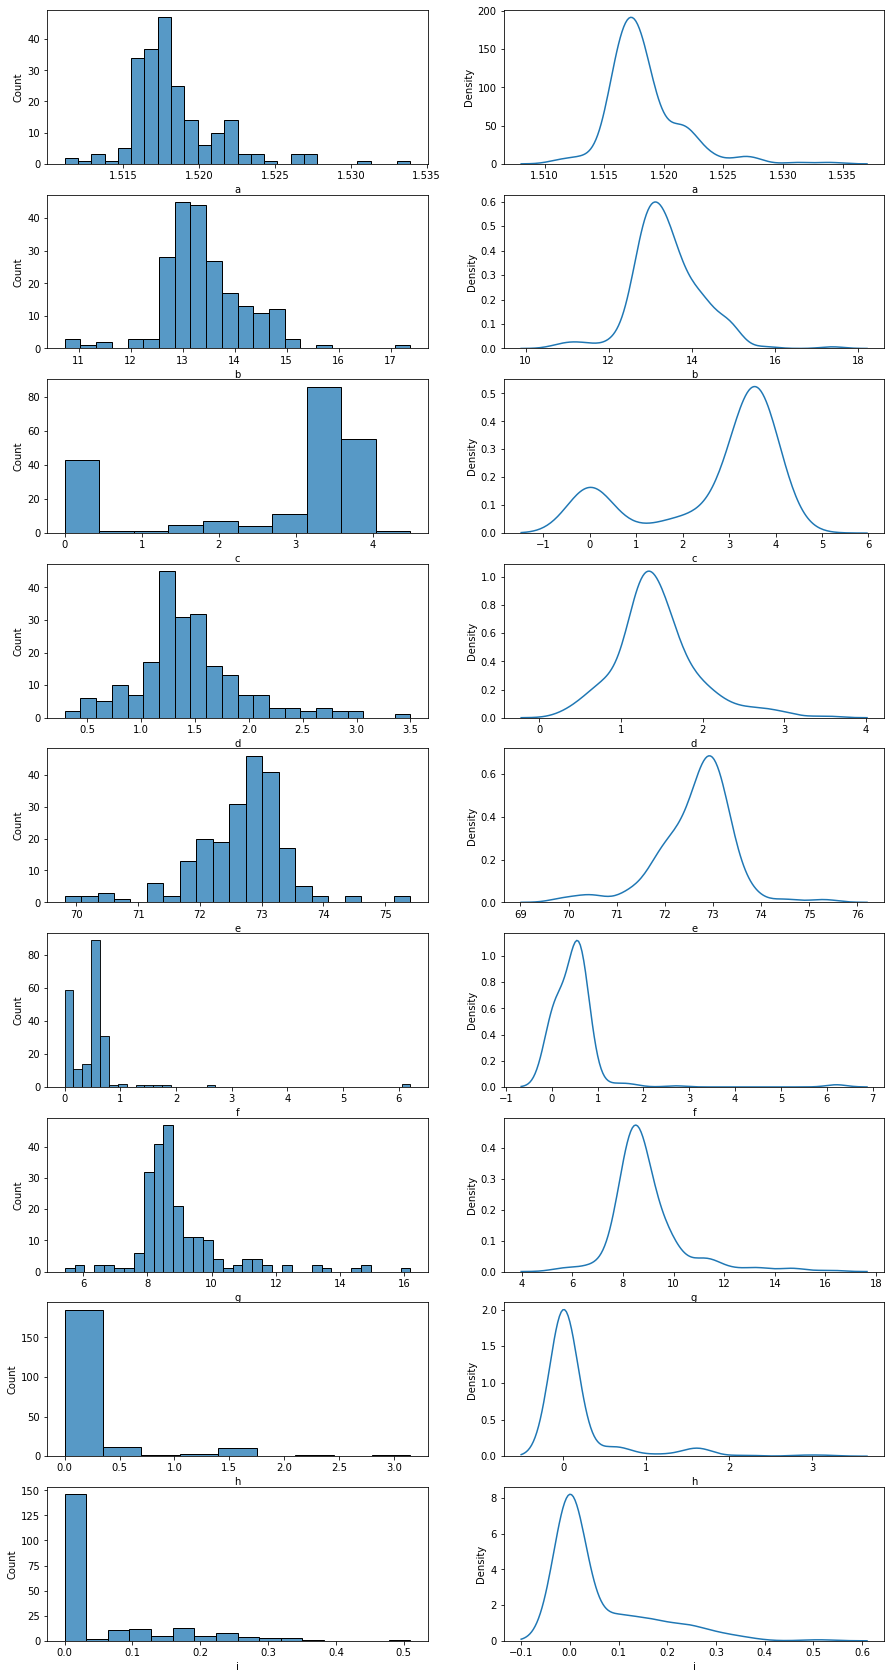

In [118]:
#Distribution and density of each additives
f, axes = plt.subplots(9, 2, figsize=(15,30))
i=0
additives = ['a','b','c','d','e','f','g','h','i']

for kind in additives:
    sns.histplot(dataset, x=kind, ax=axes[i,0])
    sns.kdeplot(dataset[kind], ax=axes[i,1])
    i=i+1

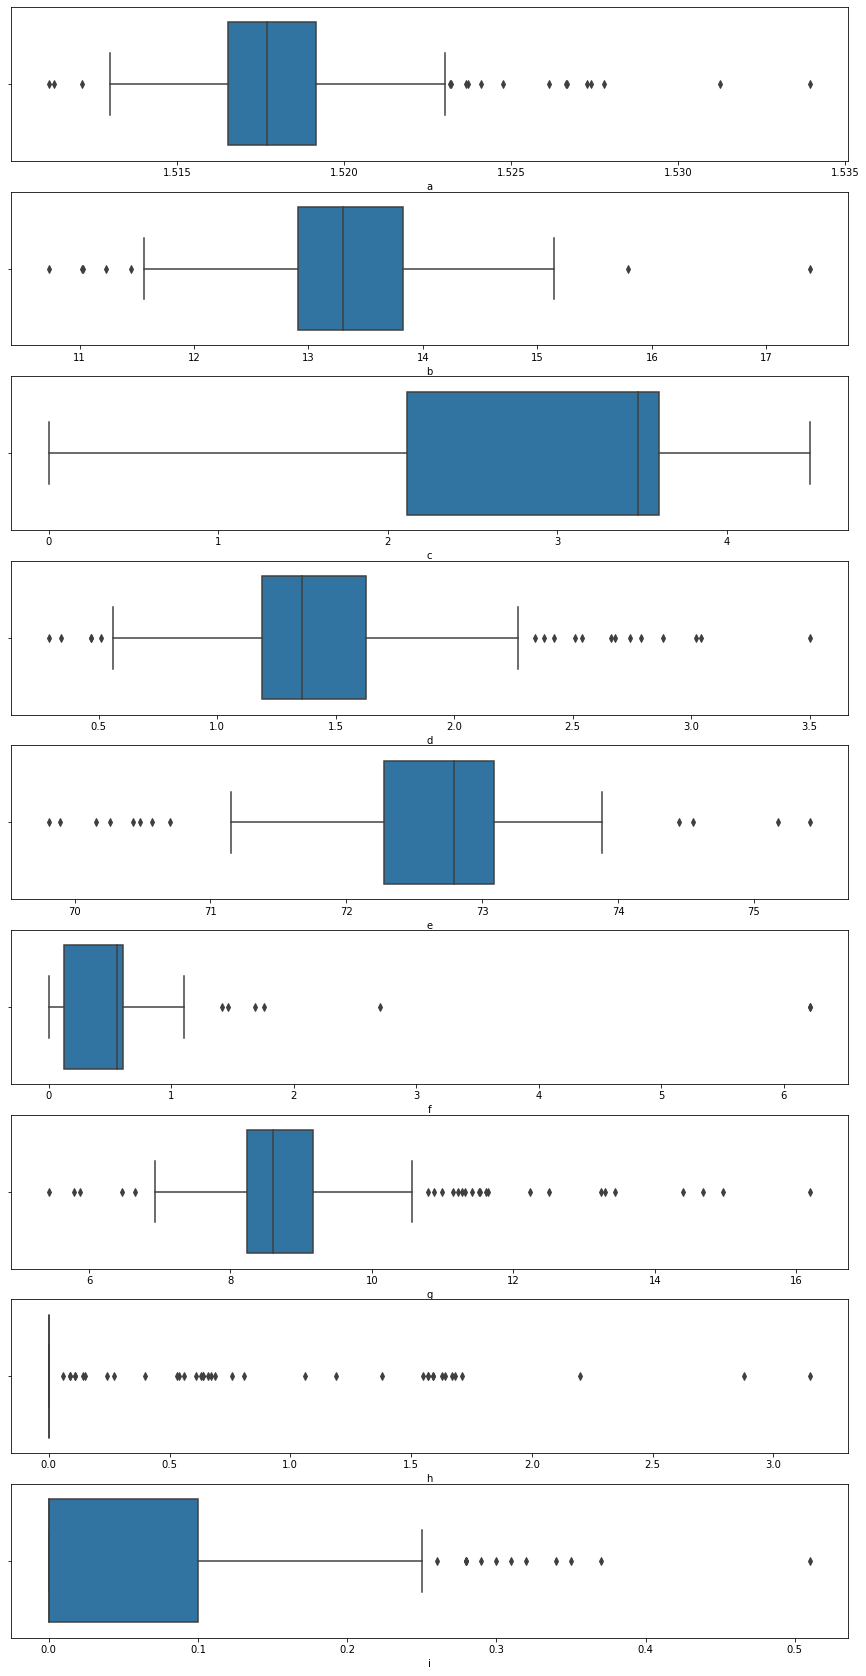

In [127]:
#Boxplot
f, axes = plt.subplots(9, 1, figsize=(15,30))
i = 0

for kind in additives:
    sns.boxplot(x=dataset[kind], ax=axes[i])
    i=i+1

<h1><u>Clustering</u></h1>

In [128]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [145]:
x = dataset.copy()

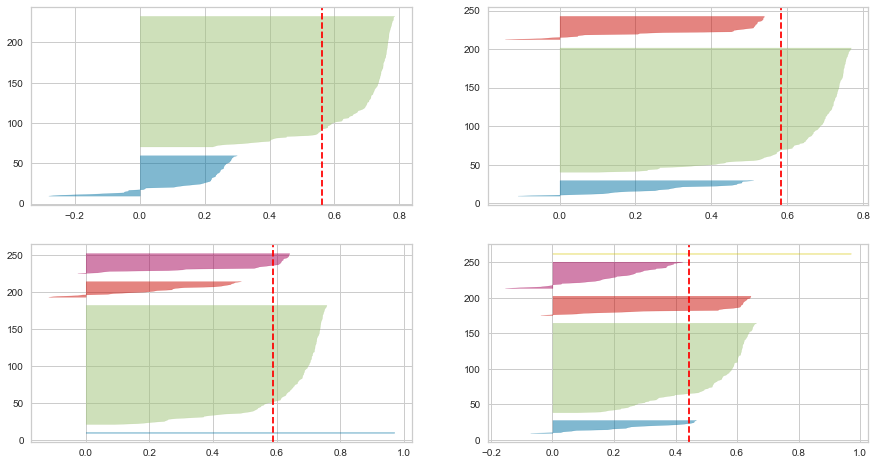

In [146]:
#Visualize the clusters from different number of clusters (so the best number of clusters can be chosen)
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))

#KMeans plot for each clusters
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    #Visualize the performance of the KMeans (Silhoutte Score)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

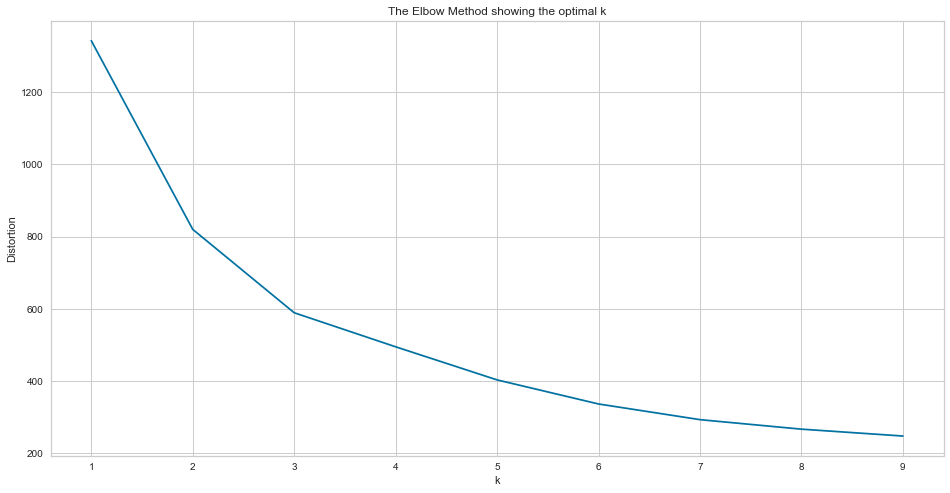

In [147]:
distortions =[]
n = range(1,10)

for k in n:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km.fit(x)
    distortions.append(km.inertia_)

plt.figure(figsize=(16,8))
plt.plot(n, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [370]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=42)
cluster_predict = kmeans.fit_predict(x)

In [371]:
cluster_predict

array([1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [372]:
pred_dataset = x.copy()
pred_dataset['Prediction'] = pd.DataFrame(cluster_predict)
pred_dataset

,a,b,c,d,e,f,g,h,i,Prediction
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,0
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,1
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22,1


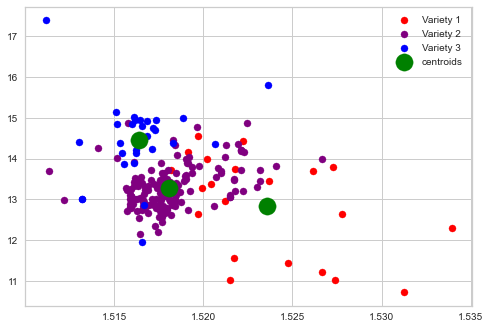

In [375]:
plt.figure(2)
plt.scatter(pred_dataset.iloc[cluster_predict == 0, 0], pred_dataset.iloc[cluster_predict == 0, 1], c='red', s=50, label = 'Variety 1')
plt.scatter(pred_dataset.iloc[cluster_predict == 1, 0], pred_dataset.iloc[cluster_predict == 1, 1], c='purple', s=50, label = 'Variety 2')
plt.scatter(pred_dataset.iloc[cluster_predict == 2, 0], pred_dataset.iloc[cluster_predict == 2, 1], c='blue', s=50, label = 'Variety 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'green', label = 'centroids')
plt.legend()
plt.show()